In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
# dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

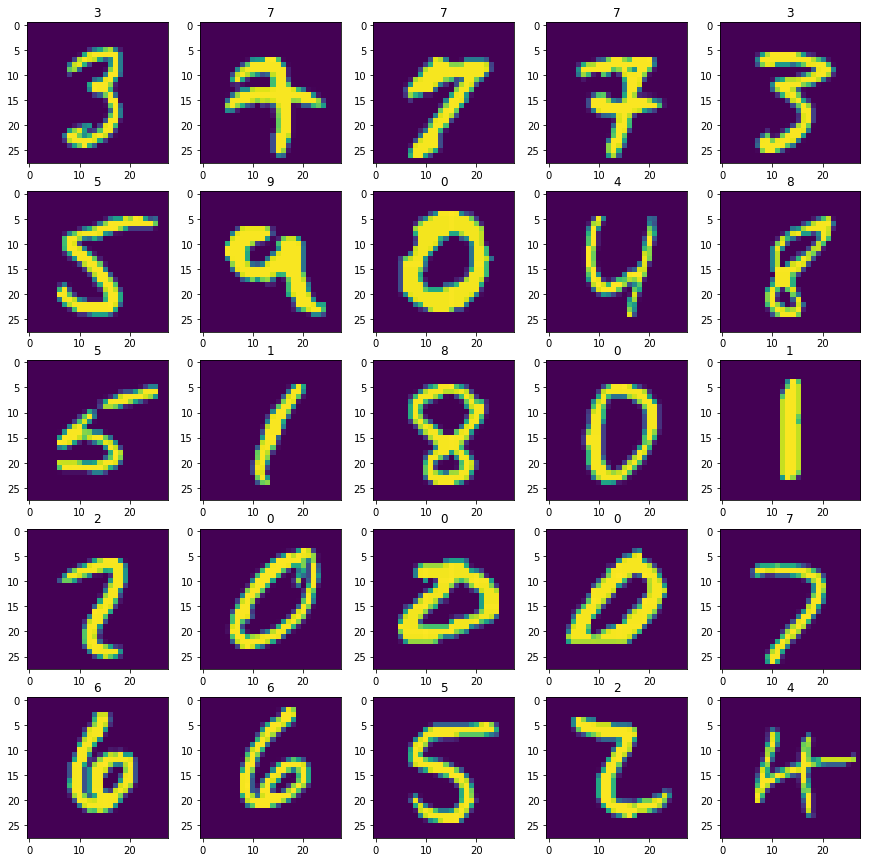

In [4]:
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 5

for i in range(1, columns*rows +1):
    idx = np.random.randint(X_train.shape[0])
    img = X_train[idx,:,:]
    ax = fig.add_subplot(rows, columns, i)
    ax.imshow(img)
#     ax.axis('off')
    ax.title.set_text(y_train[idx])
#     ax.title(train_labels[idx])
plt.show()

In [6]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
60000/60000 [==============================] - 102s 2ms/sample - loss: 0.5074 - acc: 0.9342 - val_loss: 0.1084 - val_acc: 0.9692
Epoch 2/3
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.0680 - acc: 0.9797 - val_loss: 0.0735 - val_acc: 0.9774
Epoch 3/3
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0446 - acc: 0.9866 - val_loss: 0.0850 - val_acc: 0.9777
